In [1]:
# import libraries to use (pandas, numpy, matplotlib.pyplot and seaborn)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#importing function
path = "Data_Marketing_Customer_Analysis_Round3.csv"
#load original data
def load_original_data(path):
    return pd.read_csv(path)

In [3]:
cs_df = load_original_data(path)

In [4]:
#standardising
def lower_case_column_names(cs_df):
    cs_df.columns = [i.lower() for i in cs_df.columns]
    return cs_df

In [5]:
def rename_columns(cs_df):
    cs_df.rename(columns = {'employmentstatus': 'employment_status'}, inplace = True)
    cs_df.columns = cs_df.columns.str.lower().str.replace(" ", "_")

    return cs_df

In [6]:
def drop_columns(cs_df):
    cs_df.drop(columns = ["unnamed:_0","customer"], inplace = True)
    return cs_df

In [7]:
def dd(cs_df):
    cs_df = cs_df.drop_duplicates().reset_index()
    cs_df.drop(columns = ["index"], inplace = True)
    return cs_df

In [74]:
#Replacing null values
def fill_na(cs_df):
    cs_df['number_of_open_complaints'].fillna(value=cs_df['number_of_open_complaints'].median(),inplace=True)
    cs_df['months_since_last_claim'].fillna(value=cs_df['months_since_last_claim'].mean(),inplace=True)
    cs_df['total_claim_amount'].fillna(value=cs_df['total_claim_amount'].mean(), inplace=True)
    cs_df['income'].fillna(value=cs_df['income'].mean(),inplace=True)
    cs_df['response'].dropna(inplace=True)

    return cs_df

In [9]:
#Pipeline Controler
cs_df = (load_original_data(path)
.pipe(lower_case_column_names)
.pipe(rename_columns)
.pipe(drop_columns)
.pipe(dd)
.pipe(fill_na)
)
cs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10776 entries, 0 to 10775
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          10163 non-null  object 
 1   customer_lifetime_value        10776 non-null  float64
 2   response                       10163 non-null  object 
 3   coverage                       10776 non-null  object 
 4   education                      10776 non-null  object 
 5   effective_to_date              10776 non-null  object 
 6   employment_status              10776 non-null  object 
 7   gender                         10776 non-null  object 
 8   income                         10776 non-null  int64  
 9   location_code                  10776 non-null  object 
 10  marital_status                 10776 non-null  object 
 11  monthly_premium_auto           10776 non-null  int64  
 12  months_since_last_claim        10776 non-null 

In [ ]:
cs_df.head()

##Activity 4

In [10]:
#Show a plot of the total number of responses.

num_responses = cs_df['response'].value_counts()
num_responses

No     8795
Yes    1368
Name: response, dtype: int64

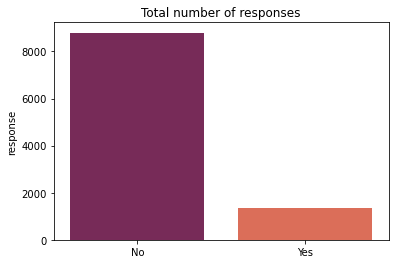

In [11]:
fig, ax = plt.subplots()

ax.set_title("Total number of responses")

sns.barplot(x=num_responses.index, y=num_responses, palette = 'rocket')

plt.show()

In [12]:
#Show response rate by channel

response_rate = cs_df.groupby(['response', 'sales_channel']).size().reset_index(name= 'count')
response_rate

,response,sales_channel,count
0,No,Agent,3142
1,No,Branch,2533
2,No,Call Center,1790
3,No,Web,1330
4,Yes,Agent,694
5,Yes,Branch,307
6,Yes,Call Center,204
7,Yes,Web,163


<AxesSubplot:title={'center':'Response rate by channel'}, xlabel='sales_channel', ylabel='count'>

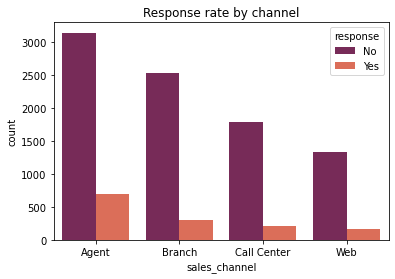

In [13]:
fig, ax = plt.subplots()

ax.set_title("Response rate by channel")

# seaborn barplot
sns.barplot(x = response_rate['sales_channel'], y = response_rate['count'], hue = response_rate['response'], data = cs_df, palette = "rocket")

#hue allows us to easily make subgroups within Seaborn plots

In [14]:
#Show a plot of the response rate by the total claim amount.

total_cl_amount = cs_df.groupby(['response','total_claim_amount']).size().reset_index(name = 'count')
total_cl_amount

,response,total_claim_amount,count
0,No,0.099007,1
1,No,0.382107,2
2,No,0.423310,2
3,No,0.517753,1
4,No,0.769185,1
...,...,...,...
5161,Yes,1261.319869,6
5162,Yes,1294.700423,6
5163,Yes,1300.800000,5
5164,Yes,1324.800000,7


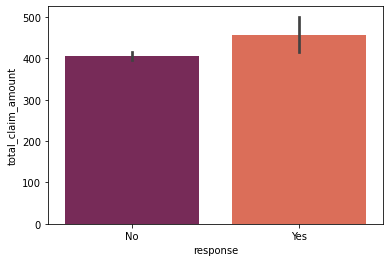

In [15]:
#plot

sns.barplot(x = total_cl_amount['response'], y = total_cl_amount['total_claim_amount'], palette = 'rocket')
plt.show()

In [16]:
#Show a plot of the response rate by income.

r_income =  cs_df.groupby(['response', 'income']).size().reset_index(name = 'count')
r_income

,response,income,count
0,No,0,2388
1,No,10037,1
2,No,10074,1
3,No,10097,2
4,No,10105,1
...,...,...,...
5699,Yes,95697,14
5700,Yes,96306,6
5701,Yes,97131,7
5702,Yes,97361,6


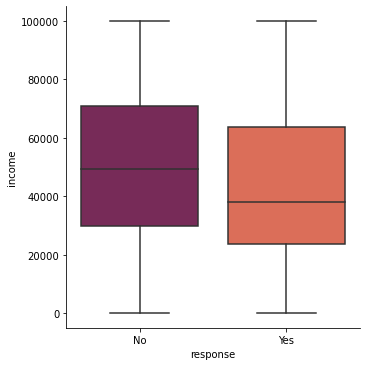

In [17]:
#plot

sns.catplot(x = 'response', y = 'income', data = r_income, kind = "box", palette = "rocket")

<AxesSubplot:>

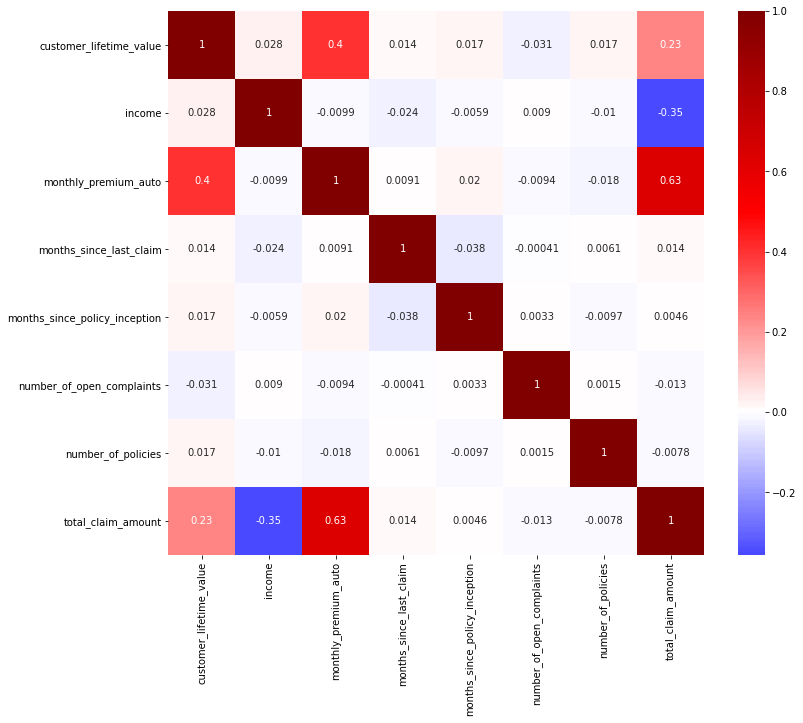

In [18]:
#Correlation heatmap

fig,ax = plt.subplots(figsize=(12,10))
sns.heatmap(cs_df.corr(),annot=True, ax=ax, cmap="seismic", center=0)

## Activity 5

In [45]:
# Getting numerical data

numerical = cs_df.select_dtypes(include = np.number)
print(numerical)

       customer_lifetime_value  income  monthly_premium_auto  \
0                  4809.216960   48029                    61   
1                  2228.525238       0                    64   
2                 14947.917300   22139                   100   
3                 22332.439460   49078                    97   
4                  9025.067525   23675                   117   
...                        ...     ...                   ...   
10771             15563.369440       0                   253   
10772              5259.444853   61146                    65   
10773             23893.304100   39837                   201   
10774             11971.977650   64195                   158   
10775              6857.519928       0                   101   

       months_since_last_claim  months_since_policy_inception  \
0                     7.000000                             52   
1                     3.000000                             26   
2                    34.000000      

In [43]:
# Getting categorical data

categorical = cs_df.select_dtypes(include = np.object)
print(categorical)

            state response  coverage education effective_to_date  \
0         Arizona       No     Basic   College           2/18/11   
1      California       No     Basic   College           1/18/11   
2      Washington       No     Basic  Bachelor         2/10/2011   
3          Oregon      Yes  Extended   College         1/11/2011   
4          Oregon       No   Premium  Bachelor           1/17/11   
...           ...      ...       ...       ...               ...   
10771      Nevada       No   Premium  Bachelor           1/19/11   
10772      Oregon       No     Basic   College         1/06/2011   
10773     Arizona       No  Extended  Bachelor         2/06/2011   
10774  California       No   Premium   College           2/13/11   
10775         NaN      NaN     Basic  Bachelor         1/08/2011   

      employment_status gender location_code marital_status     policy_type  \
0              Employed      M      Suburban        Married  Corporate Auto   
1            Unemployed  

<ipython-input-43-cbed6b1dc3d8>:3: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  categorical = cs_df.select_dtypes(include = np.object)


In [38]:
#libraries
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
%matplotlib inline
from numpy import random
import seaborn as sns
import pandas as pd
import numpy as np
import scipy as sc
#from ipywidgets import interactive
#import ipywidgets as widgets
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import preprocessing

In [47]:
min_max_scaler = preprocessing.MinMaxScaler()
numerical_scaled = min_max_scaler.fit_transform(numerical)
cs_df_normalized = pd.DataFrame(numerical_scaled)

print(cs_df_normalized)

              0         1         2         3         4    5      6         7
0      0.035752  0.480381  0.000000  0.200000  0.525253  0.0  1.000  0.101171
1      0.004059  0.000000  0.012658  0.085714  0.262626  0.0  0.000  0.257445
2      0.160264  0.221432  0.164557  0.971429  0.313131  0.0  0.125  0.165875
3      0.250953  0.490873  0.151899  0.285714  0.030303  0.0  0.125  0.167263
4      0.087527  0.236795  0.236287  0.432770  0.313131  0.0  0.750  0.244657
...         ...       ...       ...       ...       ...  ...    ...       ...
10771  0.167823  0.000000  0.810127  0.432770  0.404040  0.0  0.750  0.419717
10772  0.041281  0.611576  0.016878  0.200000  0.686869  0.0  0.625  0.094333
10773  0.270122  0.398446  0.590717  0.314286  0.636364  0.0  0.125  0.131763
10774  0.123717  0.642072  0.409283  0.000000  0.272727  0.8  0.625  0.213674
10775  0.060907  0.000000  0.168776  0.885714  0.010101  0.0  0.250  0.353118

[10776 rows x 8 columns]


In [71]:
#Check the normality of the numerical variables visually


In [72]:
cs_df.income.head()

0    48029
1        0
2    22139
3    49078
4    23675
Name: income, dtype: int64

C:\Users\DACA\AppData\Local\conda\conda\envs\DataEnv\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


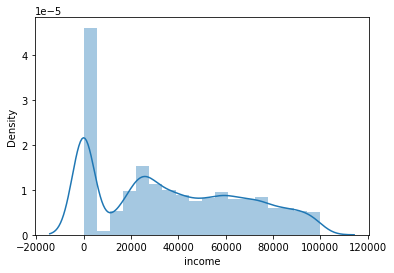

In [95]:
sns.distplot(cs_df.income, hist = True)
plt.show()

C:\Users\DACA\AppData\Local\conda\conda\envs\DataEnv\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


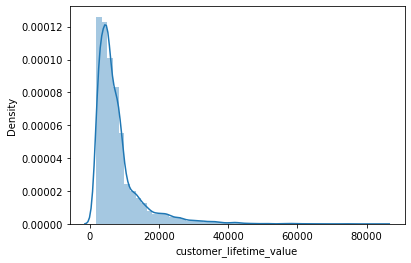

In [94]:
sns.distplot(cs_df.customer_lifetime_value,  hist = True)
plt.show()

C:\Users\DACA\AppData\Local\conda\conda\envs\DataEnv\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


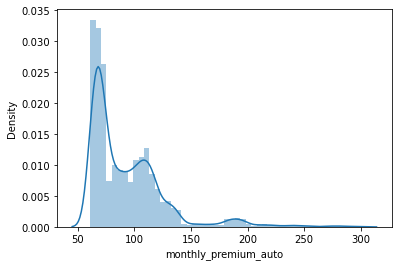

In [92]:
sns.distplot(cs_df.monthly_premium_auto, hist = True)
plt.show()

C:\Users\DACA\AppData\Local\conda\conda\envs\DataEnv\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


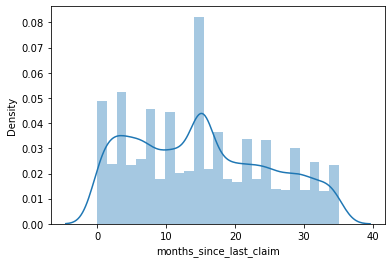

In [91]:
sns.distplot(cs_df.months_since_last_claim, hist = True)
plt.show()

C:\Users\DACA\AppData\Local\conda\conda\envs\DataEnv\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


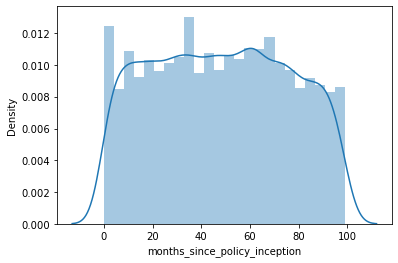

In [97]:
sns.distplot(cs_df.months_since_policy_inception, hist = True)
plt.show()

array([[<AxesSubplot:title={'center':'customer_lifetime_value'}>,
        <AxesSubplot:title={'center':'income'}>,
        <AxesSubplot:title={'center':'monthly_premium_auto'}>],
       [<AxesSubplot:title={'center':'months_since_last_claim'}>,
        <AxesSubplot:title={'center':'months_since_policy_inception'}>,
        <AxesSubplot:title={'center':'number_of_open_complaints'}>],
       [<AxesSubplot:title={'center':'number_of_policies'}>,
        <AxesSubplot:title={'center':'total_claim_amount'}>,
        <AxesSubplot:>]], dtype=object)

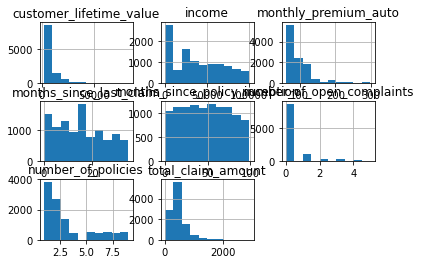

In [116]:
# Matplotlib
numerical.hist(bins=10)

<AxesSubplot:>

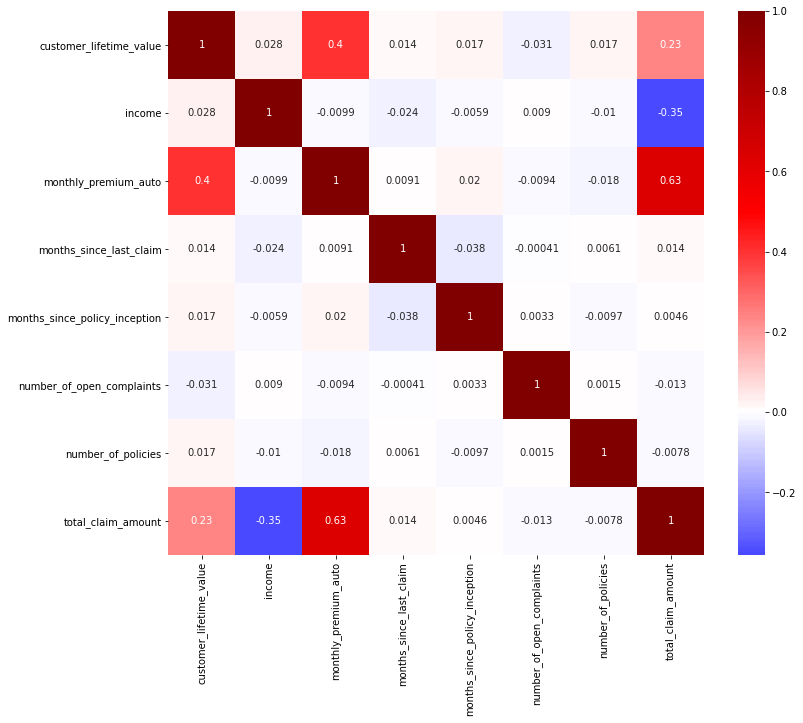

In [125]:
#For the numerical variables, check the multicollinearity between the features. Please note that we will use the column total_claim_amount later as the target variable.


fig,ax = plt.subplots(figsize=(12,10))
sns.heatmap(numerical.corr(),annot=True, ax=ax, cmap="seismic", center=0)